In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns
import plotly

 Read the dataset and do primary study of data

In [2]:
df=pd.read_csv('emp_health.csv')
df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [12]:
type(df)

pandas.core.frame.DataFrame

Learn data types of all features

In [16]:
df.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

See the statistical properties of the data

In [15]:
df.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [26]:
new_df=df[(df['age']>50) & (df['smoke']=='yes')]
new_df

print('employees above 50 age smoke',new_df.age.count())

employees above 50 age smoke 64


In [25]:
print('average expenditure on health', np.average(new_df.expenditure))

average expenditure on health 38820.22308234376


# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [67]:
mask1=df['sex']=='female'
mask2=df['alcohol']!='daily'
mask3=mask1 & mask2
x=df[mask3].id.count()
print('female employees did not consume alcohol daily',x)

female employees did not consume alcohol daily 453


In [11]:
print("Proportion with respect to total female employees is %f i.e. %.2f in every 100 women employees"
      %(len(df[mask3])/len(df[mask1]),len(df[mask3])/len(df[mask1])*100))


Proportion with respect to total female employees is 0.684290 i.e. 68.43 in every 100 women employees


# 3. Display zone wise average expenditure of employees on health

In [51]:
pd.pivot_table(df,values=['expenditure'],index='zone',aggfunc=np.mean)

,expenditure
zone,
east,13774.679941
north,14102.583403
northeast,13694.721724
northwest,12151.702619
south,14715.689519
southeast,14452.949680
southwest,12717.083869
west,12182.998872


# 4. Employees of which zone did maximum expenditure on health

In [43]:
df_new=pd.pivot_table(df,values=['expenditure'],index='zone',aggfunc=np.sum)
df_new

,expenditure
zone,
east,3.608966e+06
north,9.871808e+05
northeast,1.013409e+06
northwest,1.761997e+06
south,1.236118e+06
southeast,2.861684e+06
southwest,3.191988e+06
west,3.094482e+06


In [46]:
print("Zone with maximum employees :", df_new.expenditure.idxmax())

Zone with maximum employees : east


# 5. What is the minimum expenditure done by any employee in organization

In [47]:
new=df.expenditure.min()
print('minimum expenditure done by any employee in organization',new)

minimum expenditure done by any employee in organization 1121.8739


# 6. What is average expenditure of employees who have 2 or lesser dependents

In [32]:
new_data=df[(df['dependent']<=2)]
new_data


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
...,...,...,...,...,...,...,...,...,...
1331,i11343,23,female,33.400,0,daily,no,southwest,10795.93733
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [48]:
new=np.average(df[df['dependent']<=2].expenditure)
print('average expenditure of employees who have 2 or lesser dependents',new)

average expenditure of employees who have 2 or lesser dependents 13040.970970948154


# 7. How many employees are below age of 20 years. What is their average BMI

In [50]:
new=df[df['age']<20]
print('Employees below age of 20 years is',len(new))

Employees below age of 20 years is 137


In [51]:
new_df=np.average(new.bmi)
print('employees are below age of 20 years. What is their average BMI',new_df)

employees are below age of 20 years. What is their average BMI 29.97149635036496


# 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [52]:
d1=df[(df['smoke']=='no') & (df['sex']=='male')]
d1[['smoke','sex']]

,smoke,sex
1,no,male
2,no,male
3,no,male
4,no,male
8,no,male
...,...,...
1324,no,male
1325,no,male
1327,no,male
1329,no,male


# 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [74]:
d2=df[(df['alcohol']=='no') & (df['sex']=='male')]
d2[['alcohol','sex']]

,alcohol,sex
18,no,male
24,no,male
28,no,male
37,no,male
38,no,male
...,...,...
1291,no,male
1301,no,male
1310,no,male
1320,no,male


# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [76]:
new_df=pd.merge(d1,d2)
new_df[['smoke','alcohol','id']]

,smoke,alcohol,id
0,no,no,i10030
1,no,no,i10036
2,no,no,i10040
3,no,no,i10049
4,no,no,i10079
...,...,...,...
104,no,no,i11273
105,no,no,i11282
106,no,no,i11322
107,no,no,i11332



# 11.What is the count for each zone with respect to number of dependent

In [77]:
d_new=pd.DataFrame(df.groupby(by=['zone','dependent']).dependent.count())
d_new.rename(columns={'dependent': 'Occurence'},inplace=True)
d_new

Occurence
zone      dependent           
east      0                124
          1                 65
          2                 42
          3                 22
          4                  6
          5                  3
north     0                 26
          1                 20
          2                 10
          3                 12
          4                  1
          5                  1
northeast 0                 35
          1                  9
          2                 15
          3                 13
          4                  2
northwest 0                 70
          1                 28
          2                 30
          3                 13
          4                  4
south     0                 38
          1                 21
          2                 12
          3                 12
          4                  1
southeast 0                 81
          1                 57
          2                 38
          3                 15
          4                  2
          5                  5
southwest 0                116
          1                 53
          2                 44
          3                 25
          4                  6
          5                  7
west      0                 84
          1                 71
          2                 49
          3                 45
          4                  3
          5                  2

# 12. Classify the employees into 3 categories. What is the average expenditure of employees in each category. Display the bar chart for the same



In [8]:
ds2=df.copy()
condition =[(df['bmi']<18.5),(df['bmi']>=18.5) & (df['bmi']<=24.9),(df['bmi']>24.9)]
category=['Category_1','Category_2','Category_3']
ds2['Category']=np.select(condition,category)
ds2.groupby(by='Category').expenditure.mean()

Category
Category_1     8852.200585
Category_2    10379.499732
Category_3    13936.616823
Name: expenditure, dtype: float64

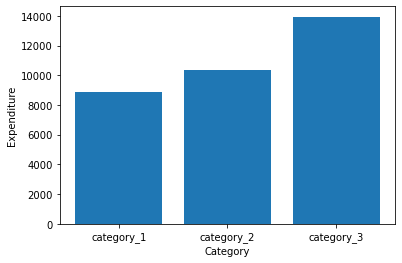

In [15]:
plt.bar(['category_1','category_2','category_3'],ds2.groupby(by='Category').expenditure.mean())

plt.xlabel('Category')
plt.ylabel('Expenditure')

plt.show()


# 13. Draw line plot of expenditure against age and BMI

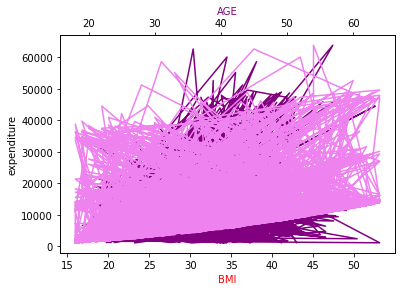

In [5]:
fig, ax1 = plt.subplots()
ax1.plot(df.bmi,df['expenditure'], color= 'purple' )
ax1.set_xlabel('BMI', color='red')
ax2 = ax1.twiny()  
ax2.plot(df['age'],df.expenditure, color='violet')
ax2.set_xlabel('AGE', color = 'purple') 
ax1.set_ylabel('expenditure')
plt.show()

# 14.  Draw a bar chart to show zone wise average expenditure

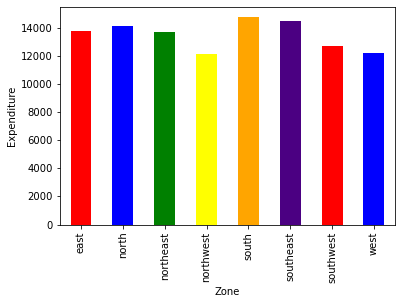

In [12]:
plot_new=df.groupby(by='zone').expenditure.mean().plot(kind='bar',color=['red','blue','green','yellow','orange','indigo'])

plt.xlabel('Zone')
plt.ylabel('Expenditure')

plt.show()

# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [15]:
smoker_expenditure = pd.pivot_table(df, index='smoke',values='expenditure',aggfunc='mean')
smoker_expenditure

,expenditure
smoke,
no,8434.268298
yes,32050.231832


In [16]:
alcoholic_expenditure = pd.pivot_table(df, index='alcohol',values='expenditure',aggfunc='mean')
alcoholic_expenditure

,expenditure
alcohol,
daily,13001.772968
no,14277.090885
party,13050.583157
rarely,12419.686784
weekend,13145.632539


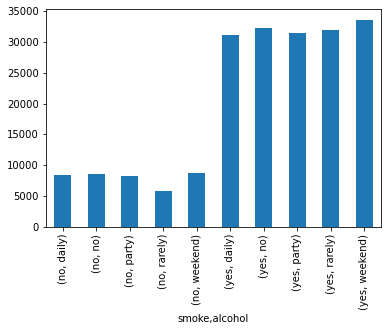

In [20]:
#combined view

plot_new=df.groupby(by=['smoke','alcohol']).expenditure.mean().plot(kind='bar')

Text(0, 0.5, 'average expenditure')

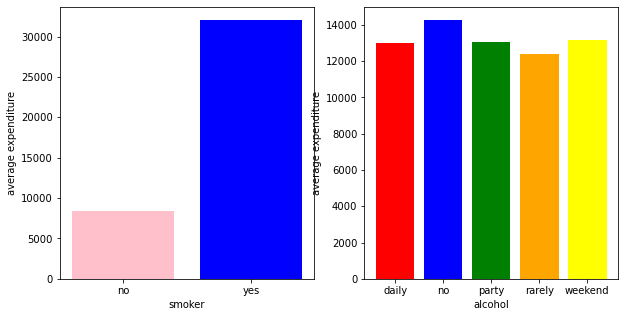

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(smoker_expenditure.index,smoker_expenditure.expenditure, color=['pink','blue'])
plt.xlabel('smoker',fontsize=10)
plt.ylabel('average expenditure',fontsize=10)
plt.subplot(1,2,2)
plt.bar(alcoholic_expenditure.index,alcoholic_expenditure.expenditure, color=['red','blue','green','orange','yellow'])
plt.xlabel('alcohol',fontsize=10)
plt.ylabel('average expenditure',fontsize=10)

# 16. Draw pie chart for alcohol consumption habits

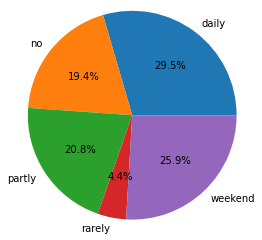

In [110]:
plt.pie(df.groupby(by='alcohol').alcohol.count(), autopct = '%.1f%%', radius = 1.2, labels = ['daily','no','partly','rarely','weekend'])
plt.show()

In [108]:
df.groupby(by='alcohol').alcohol.count()

alcohol
daily      395
no         259
party      278
rarely      59
weekend    347
Name: alcohol, dtype: int64

# 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

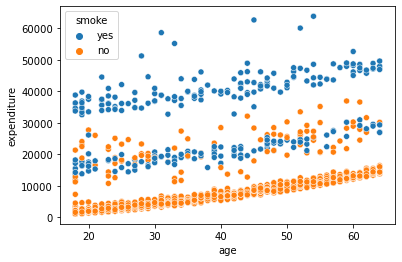

In [36]:
sns.scatterplot(x='age', y='expenditure', data=df, hue='smoke')

plt.show()

# 18. Draw distribution plot of expenditure

<AxesSubplot:xlabel='expenditure'>

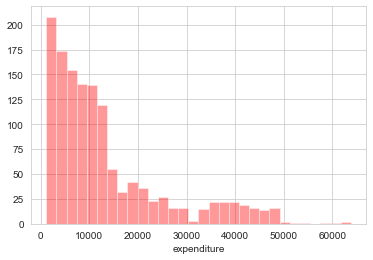

In [114]:
sns.set_style('whitegrid')
sns.distplot(df['expenditure'], kde = False, color ='red', bins = 30)


# 19. Display the pairplot

<Figure size 1080x576 with 0 Axes>

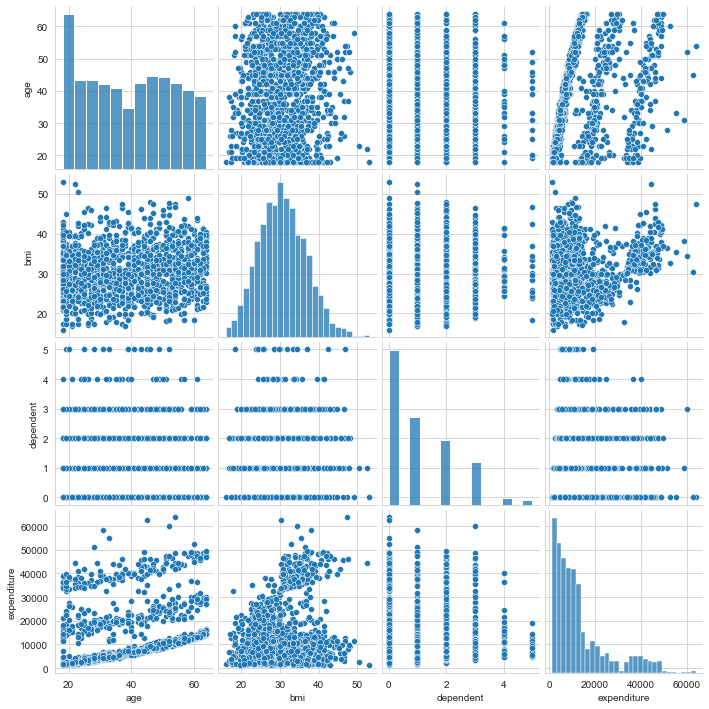

In [7]:
plt.figure(figsize = (15,8))


sns.pairplot(df)


plt.show()

# 20. Display heatmap for the data

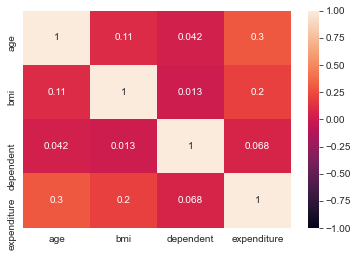

In [8]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True, vmin = -1)

plt.show()